In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def load_data(planet_name, sim_no, N, theta):
    sim_name = get_sim_name_by_number(sim_no)
    data_files = []
    simulation_methods = ['Euler', 'RK45', 'DOP853', 'Radau']
    for sim_method in simulation_methods:
        file_name = f'{planet_name}_{sim_name}_{sim_method}_theta_{theta}.csv'
        file_path = os.path.join('data', 'simulation_results', f'N={N}', file_name)
        data_files.append(file_path)

    datas = []
    used_sim_methods = []
    for file, method in zip(data_files, simulation_methods):
        if os.path.isfile(file):
            used_sim_methods.append(method)
            data = np.loadtxt(file, skiprows=1, delimiter=',')
            datas.append(data)

    return datas, used_sim_methods, 

def plot_data(datas, sim_methods, planet_name, sim_no, N, theta, show_plot=False, show_legend=False):

    if len(sim_methods) > 1:
        show_legend = True
    
    markers = ['.-', 's--', '*-.', 'x:']
    used_markers = [markers[i] for i in range(len(sim_methods))]

    # ------------------- plot ------------------
    plt.figure(figsize=(12,8))
    for data, sim_method, marker in zip(datas, sim_methods, used_markers):
        ax1 = plt.subplot(2, 2, 1)
        ax1.plot(data[:,0], data[:,1], marker, label=sim_method)
        ax1.set_xlabel('r [cm]')
        ax1.set_ylabel('m [g]')
        ax1.set_title('Mass')
        ax1.grid(True, alpha=0.3)
        if show_legend:
            ax1.legend()

        ax2 = plt.subplot(2, 2, 2, sharex=ax1)
        ax2.plot(data[:,0], data[:,2], marker, label=sim_method)
        ax2.set_yscale('log')
        ax2.set_xlabel('r [cm]')
        ax2.set_ylabel('p [dyne cm$^{-2}$]')
        ax2.set_title('Pressure')
        ax2.grid(True, alpha=0.3)
        if show_legend:
            ax2.legend()

        ax3 = plt.subplot(2, 2, 3, sharex=ax1)
        ax3.plot(data[:,0], data[:,3], marker, label=sim_method)
        ax3.set_yscale('log')
        ax3.set_xlabel('r [m]')
        ax3.set_ylabel('$\\rho$ [g cm$^{-3}$]')
        ax3.set_title('Density')
        ax3.grid(True, alpha=0.3)
        if show_legend:
            ax3.legend()
            
        if data[:,5][-1] != 0:
            ax4 = plt.subplot(2, 2, 4, sharex=ax1)
            ax4.plot(data[:,0], data[:,5], marker, label=sim_method)
            ax4.set_xlabel('r [cm]')
            ax4.set_ylabel('T [K]')
            ax4.set_title('Temperature')
            ax4.grid(True, alpha=0.3)
            if show_legend:
                ax4.legend()

    # ------------------ title ------------------
    N_eff = len(datas[0][:,0])
    MoI = datas[0][0,4]

    sim_name = ''
    name_parts = get_sim_name_by_number(sim_no).split('_')
    for part in name_parts[1:]:
        if part == 'MgSiO3':
            part = 'MgSiO$_3$'
        if part[0].islower():
            part = part[0].upper() + part[1:]
        sim_name += part + ' '

    if len(sim_methods) == 1:
        title = f'{planet_name} \u2013 {sim_name} \u2013 {sim_methods[0]}\nN={N_eff}, $\\theta$={theta}, ' + '$I_\\text{norm}$=' + f'{MoI:.2e}'
    else:
        title = f'{planet_name} \u2013 {sim_name}\nN={N_eff}, $\\theta$={theta}, ' + '$I_\\text{norm}$=' + f'{MoI:.2e}'
        
    plt.suptitle(title)
    plt.tight_layout()

    # ------------------ save -------------------
    sim_name = get_sim_name_by_number(sim_no)
    if len(sim_methods) == 1:
        file_name = f'{planet_name}_{sim_name}_{sim_methods[0]}_theta_{theta}.pdf'
    else:
        file_name = f'{planet_name}_{sim_name}_Multi_theta_{theta}.pdf'

    folder_path = os.path.join('plots', f'N={N}')
    file_path = os.path.join(folder_path, file_name)
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(file_path)

    if show_plot:
        plt.show()
    plt.close()

def get_sim_name_by_number(number):
    sim_names = {
        1 : '01_ideal_gas',
        2 : '02_polytropic',
        3 : '03_analytical_Fe',
        4 : '04_analytical_MgSiO3',
        5 : '05_tabulated_H',
        6 : '06_tabulated_H2O'
    }

    return sim_names[number]


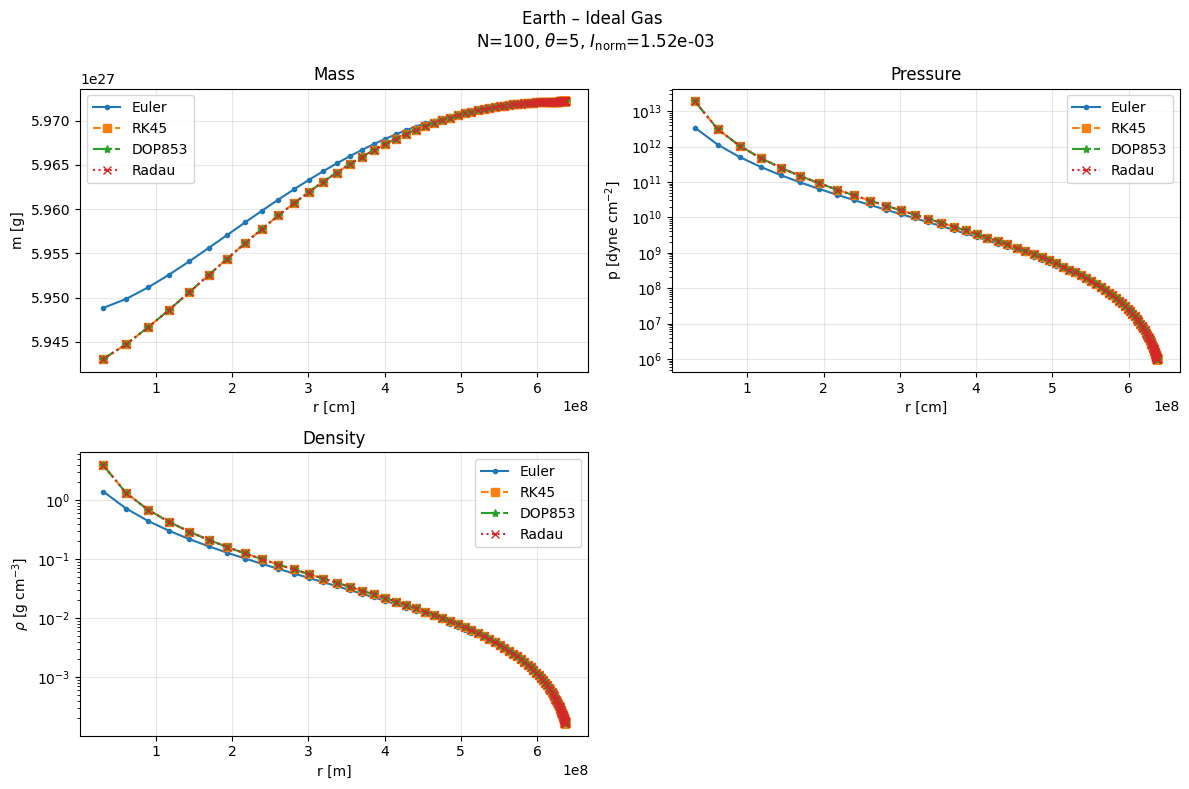

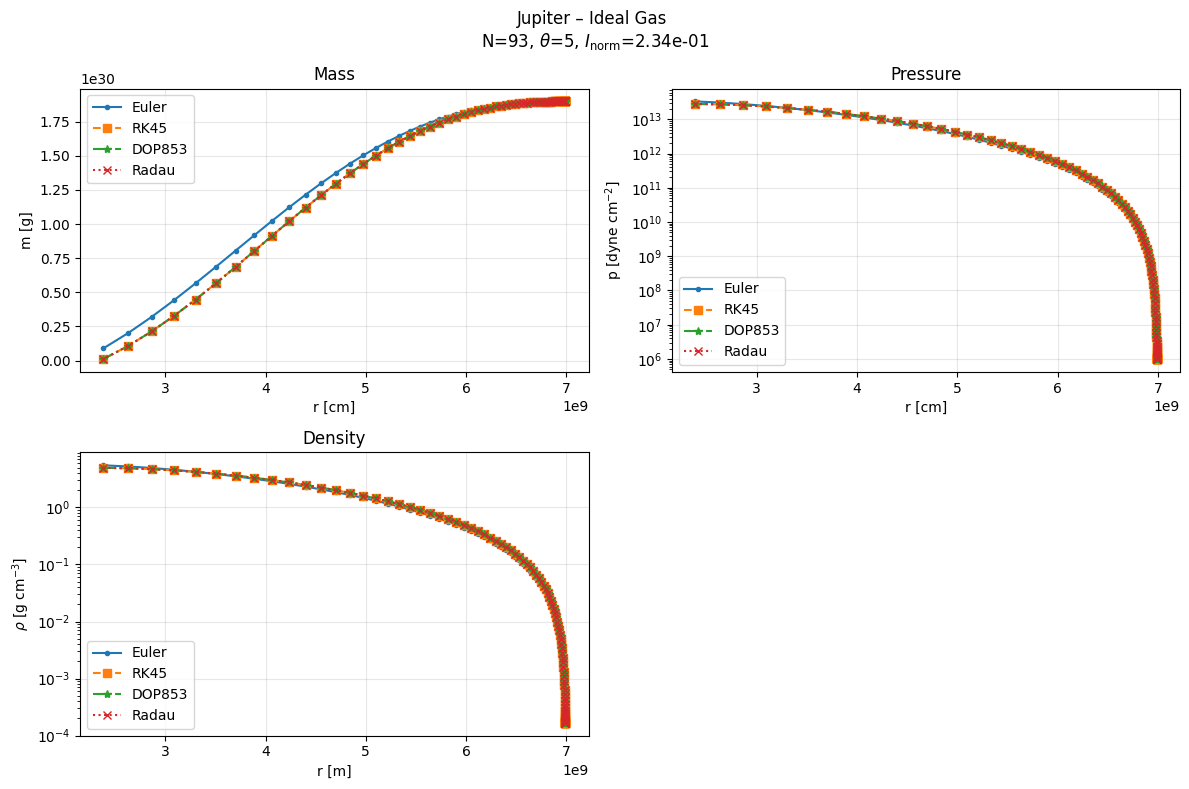

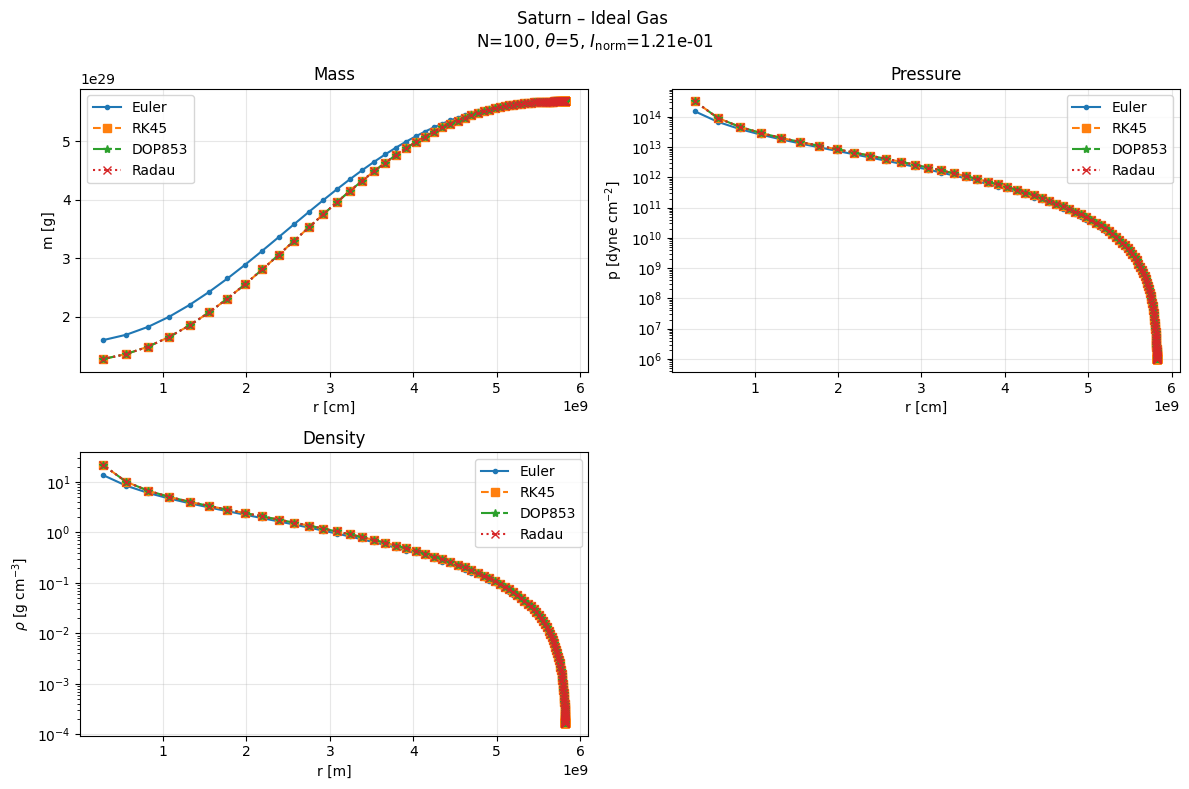

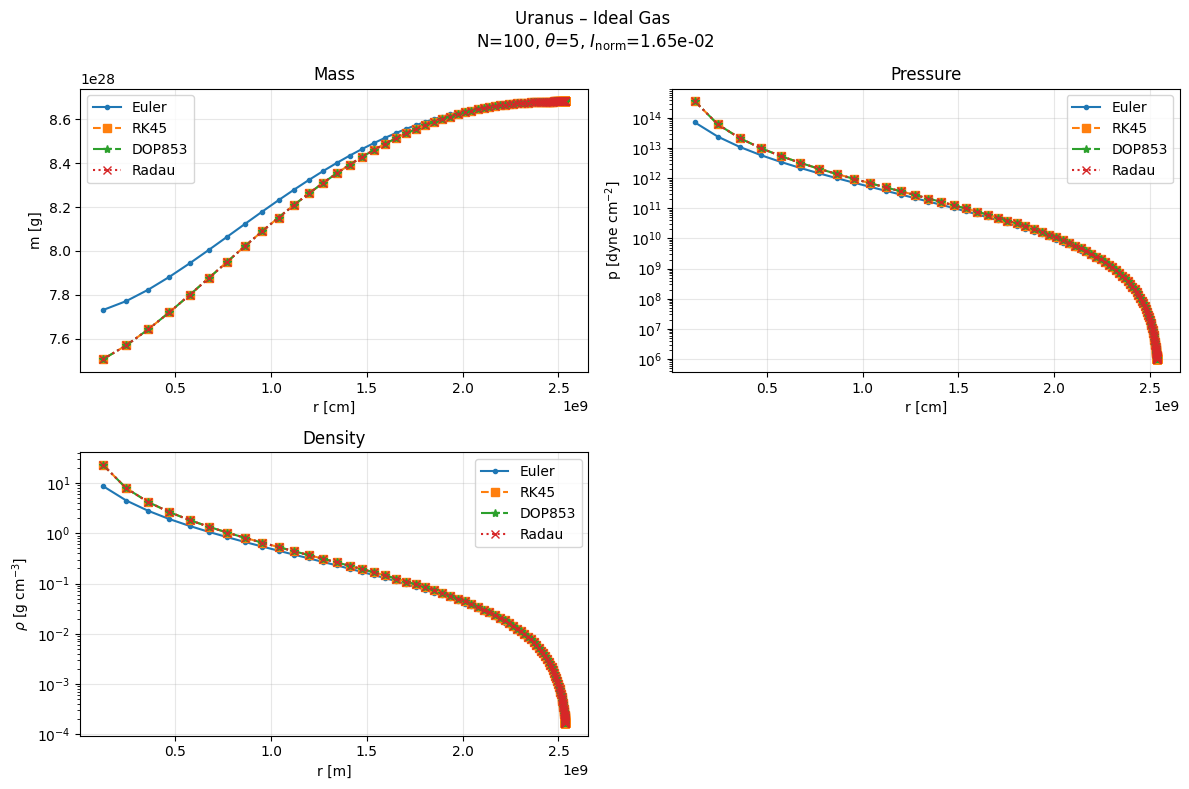

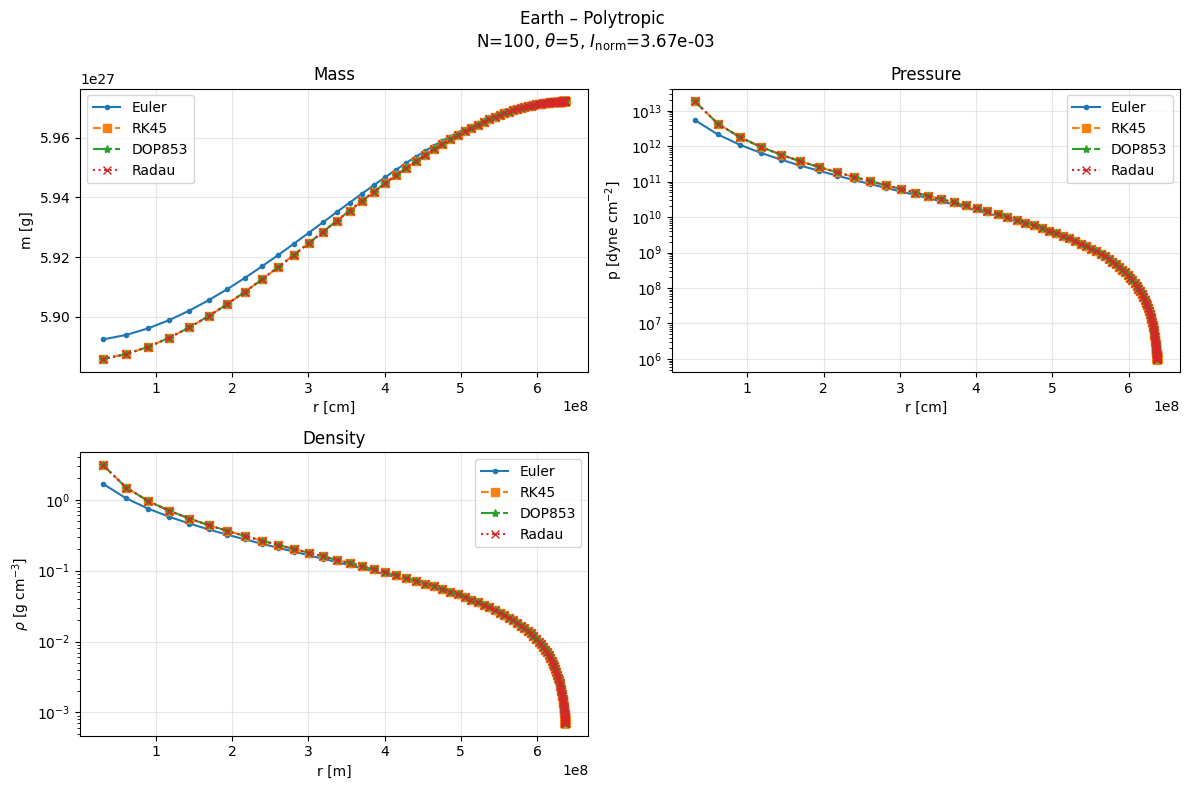

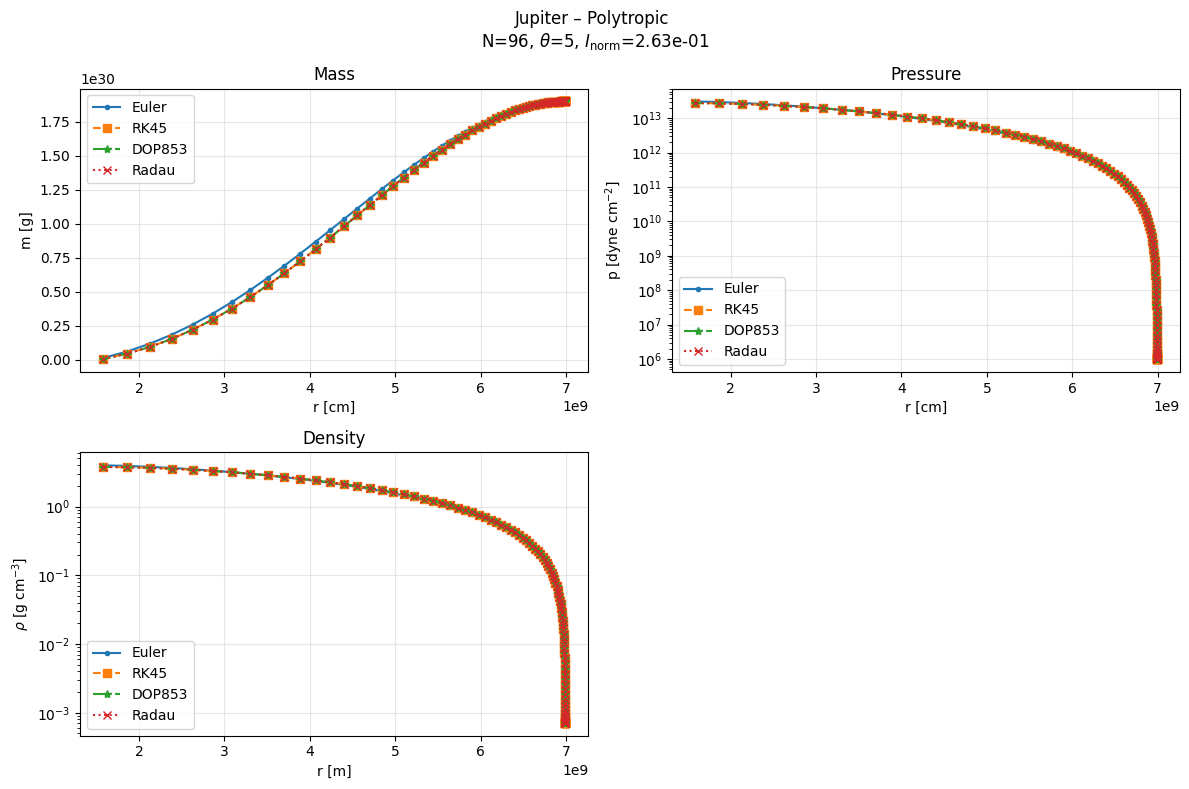

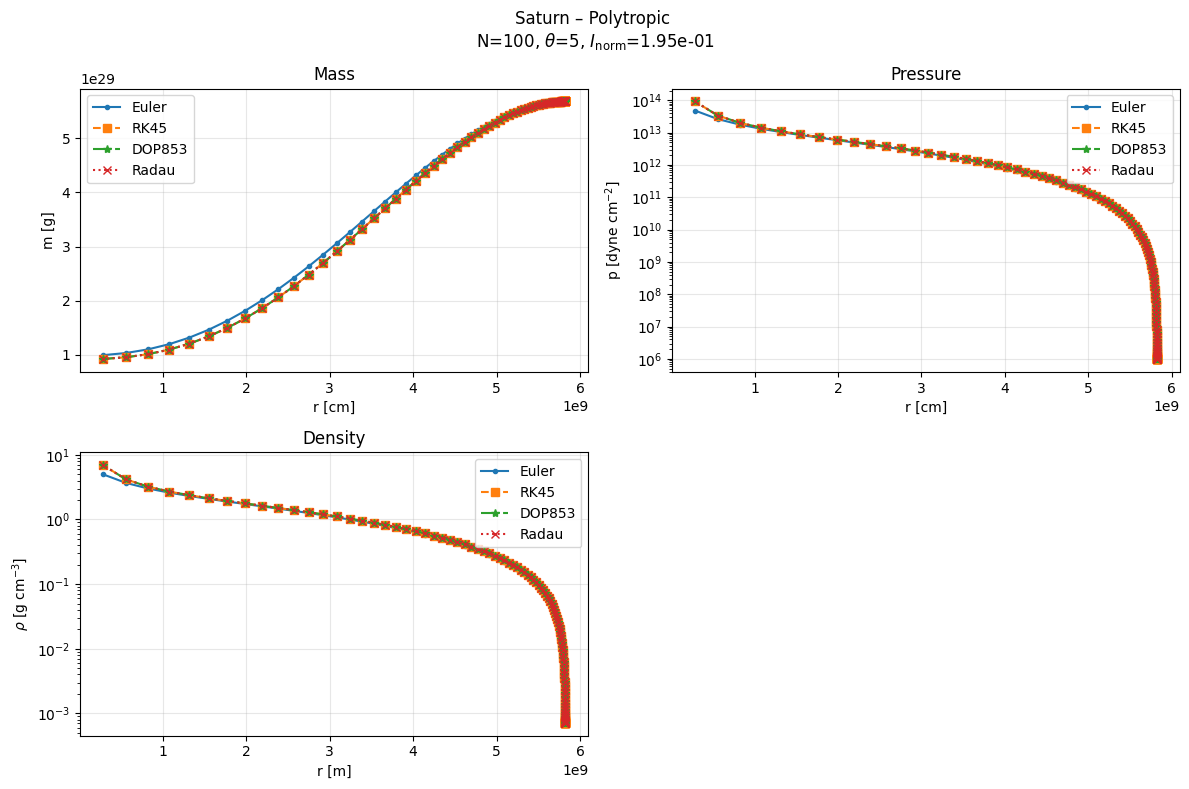

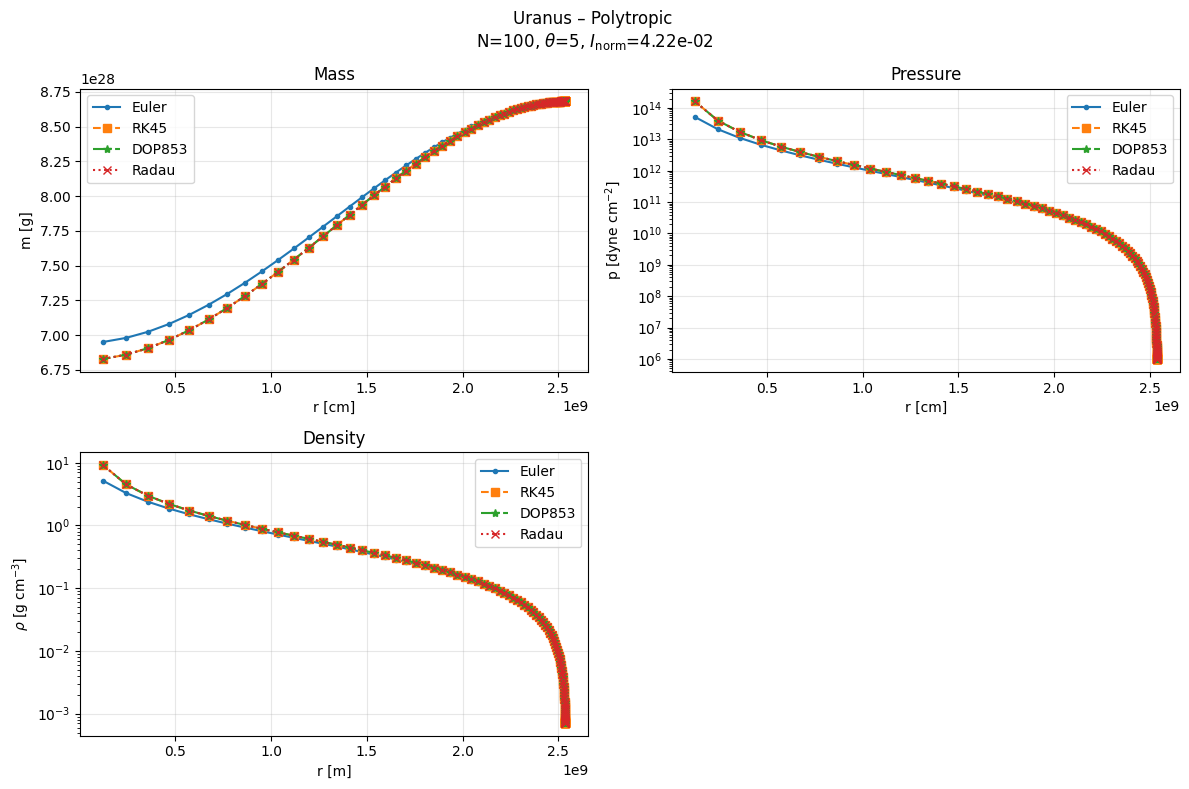

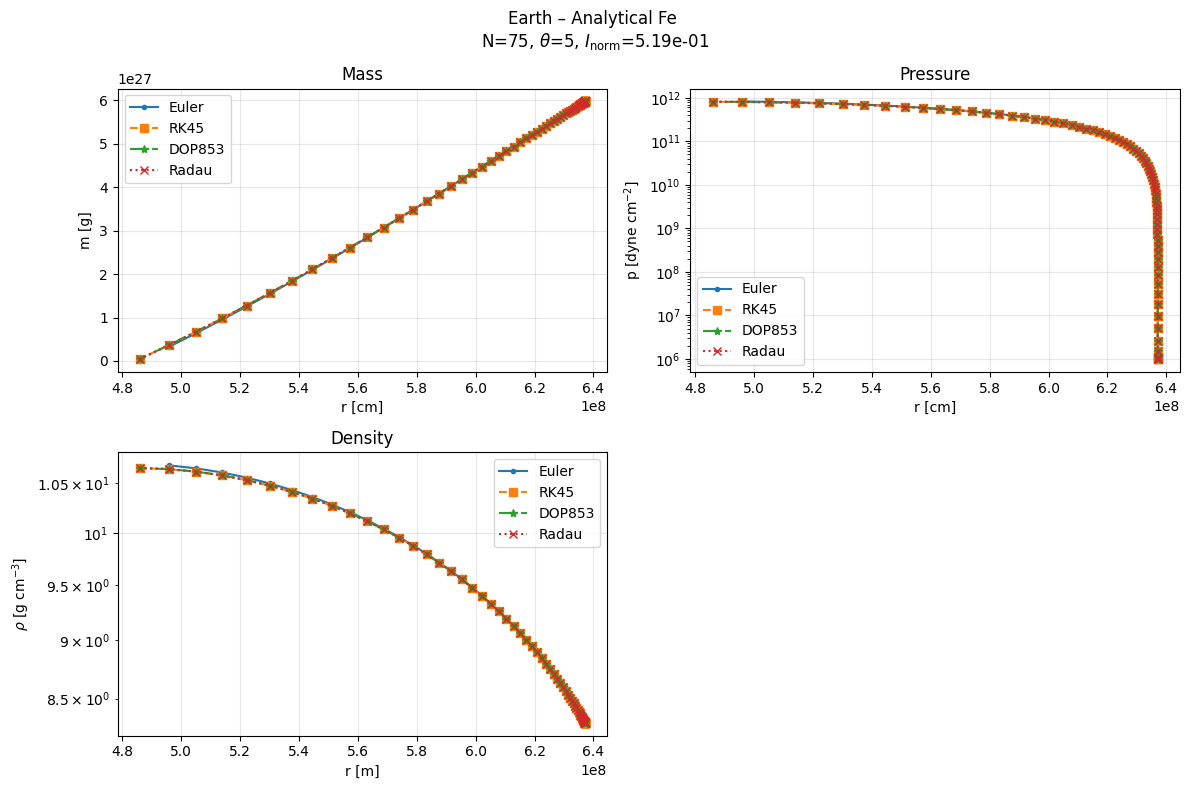

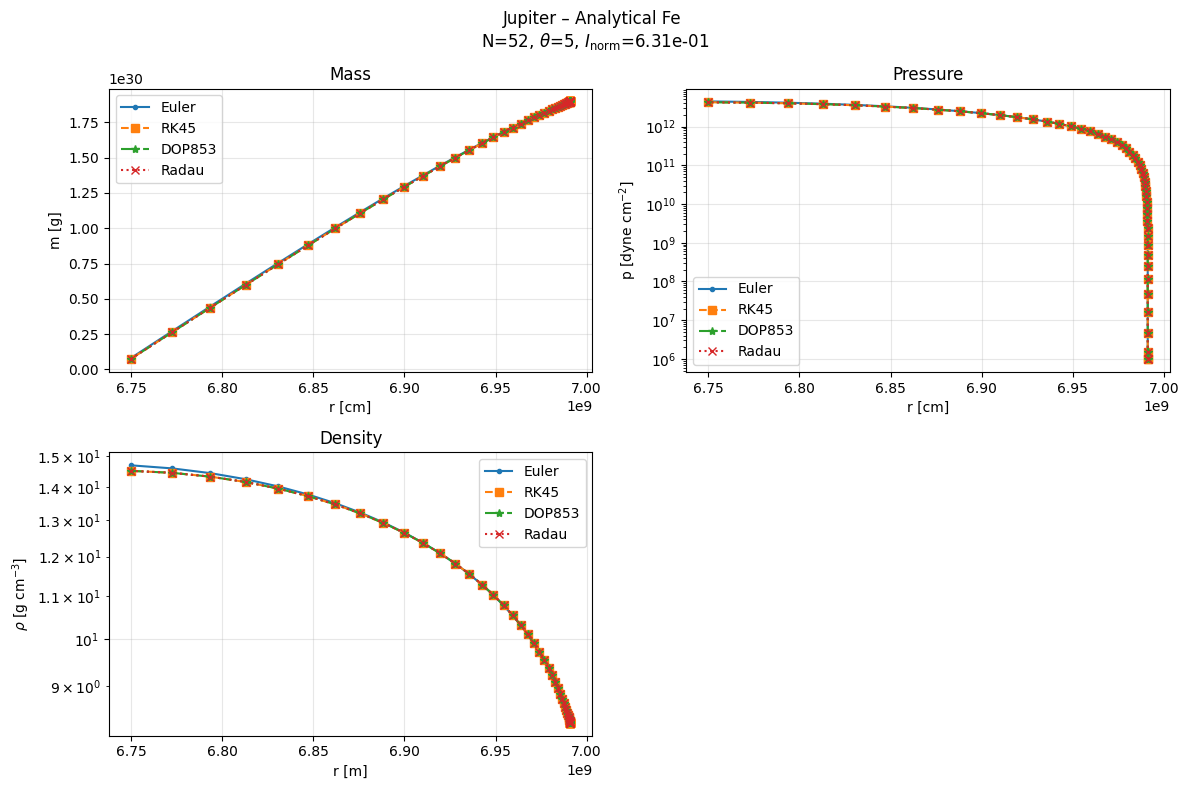

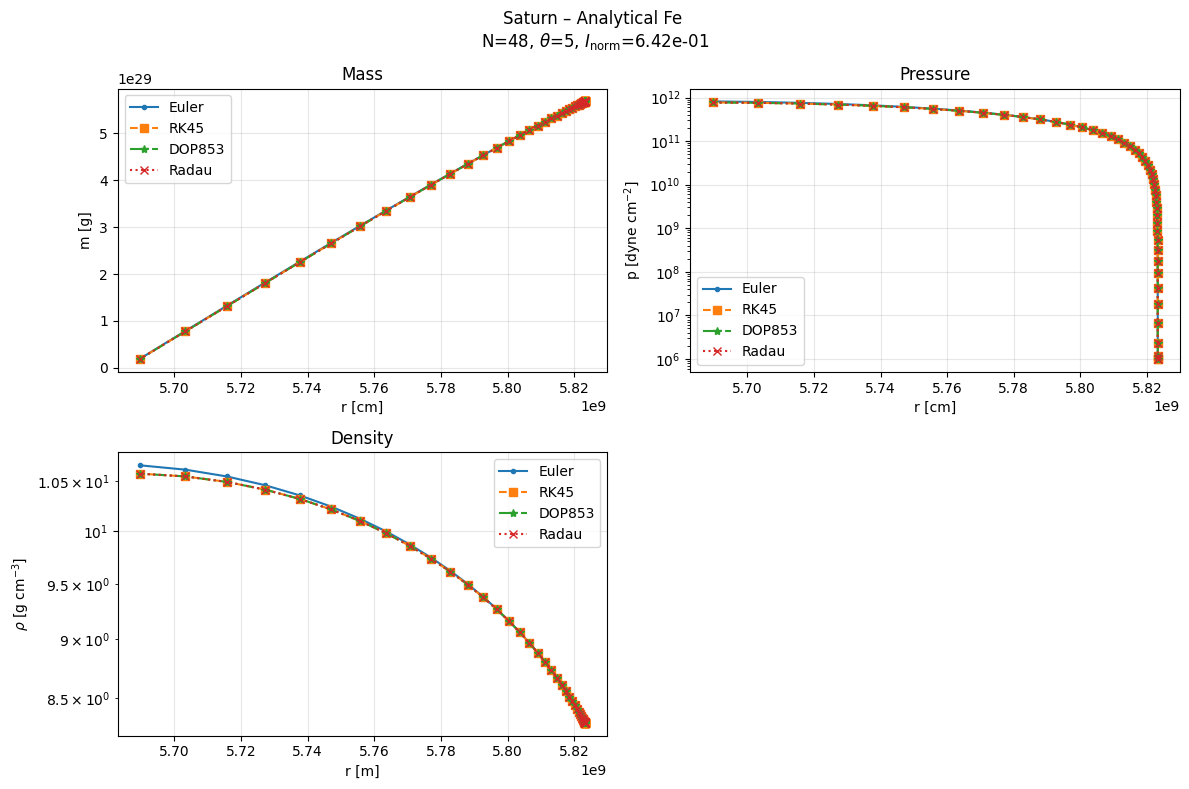

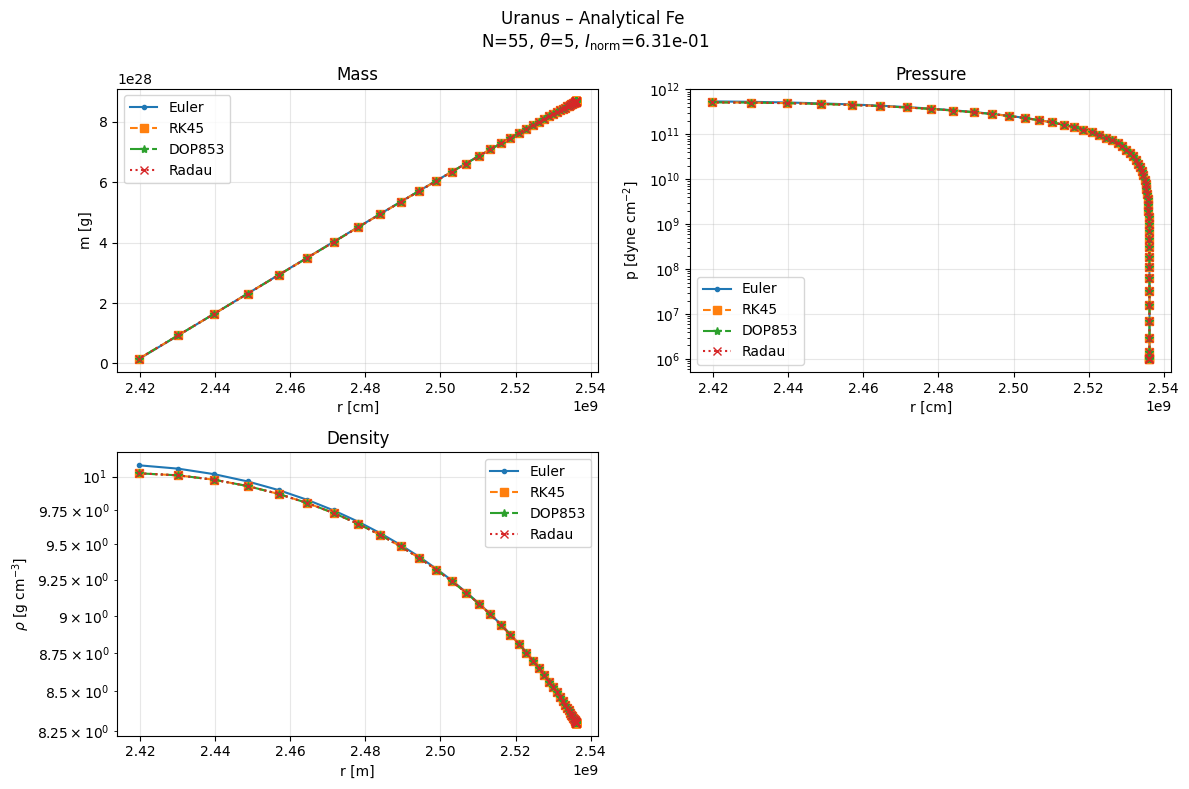

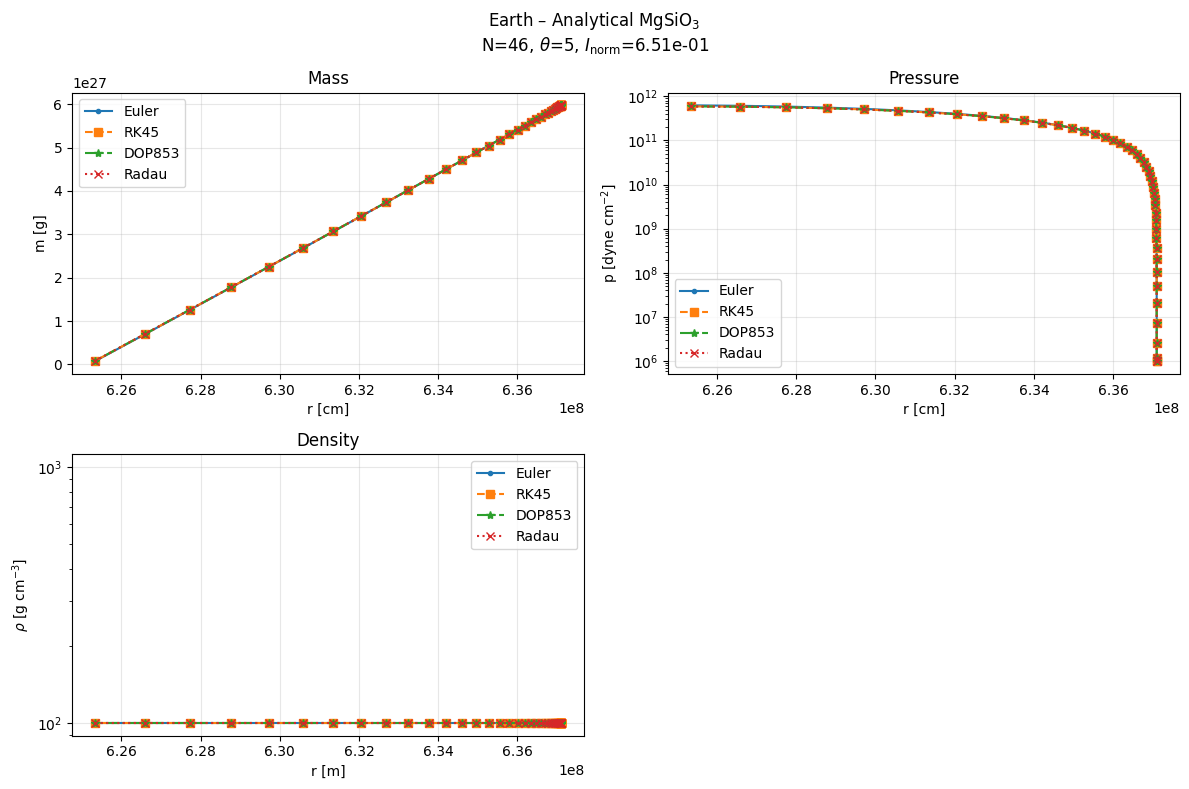

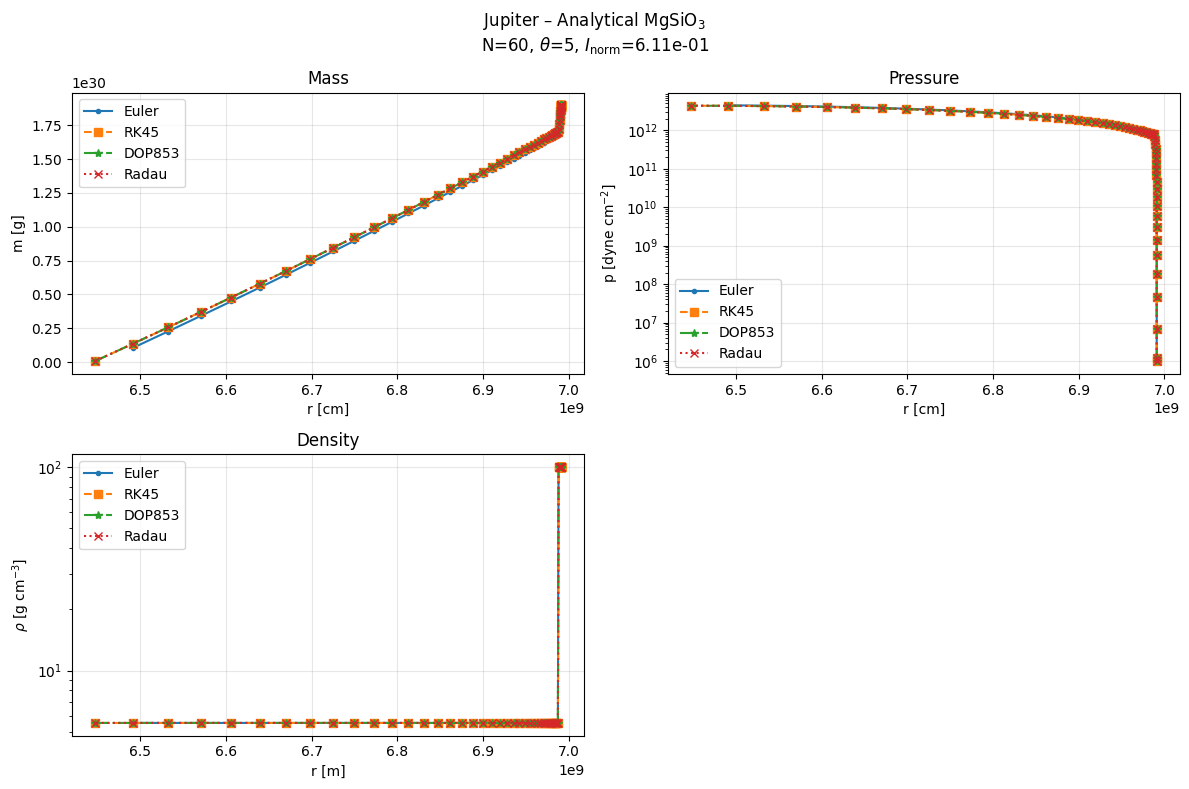

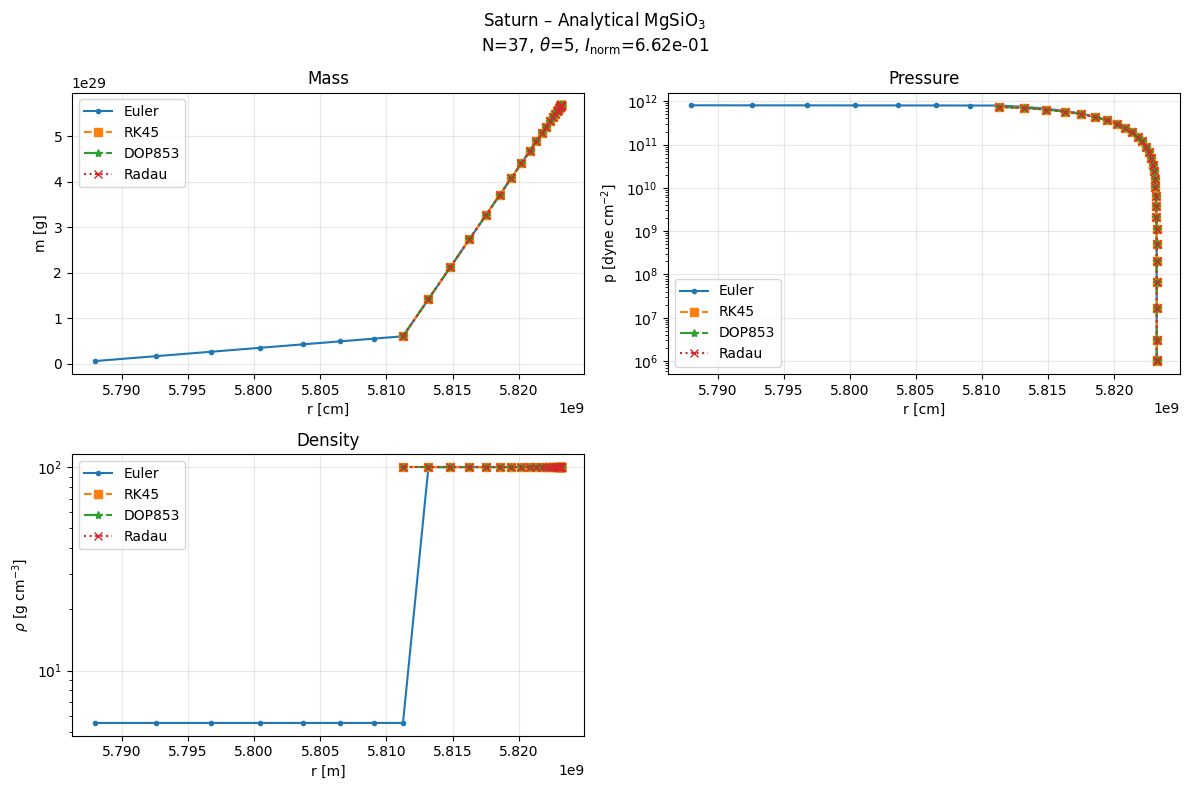

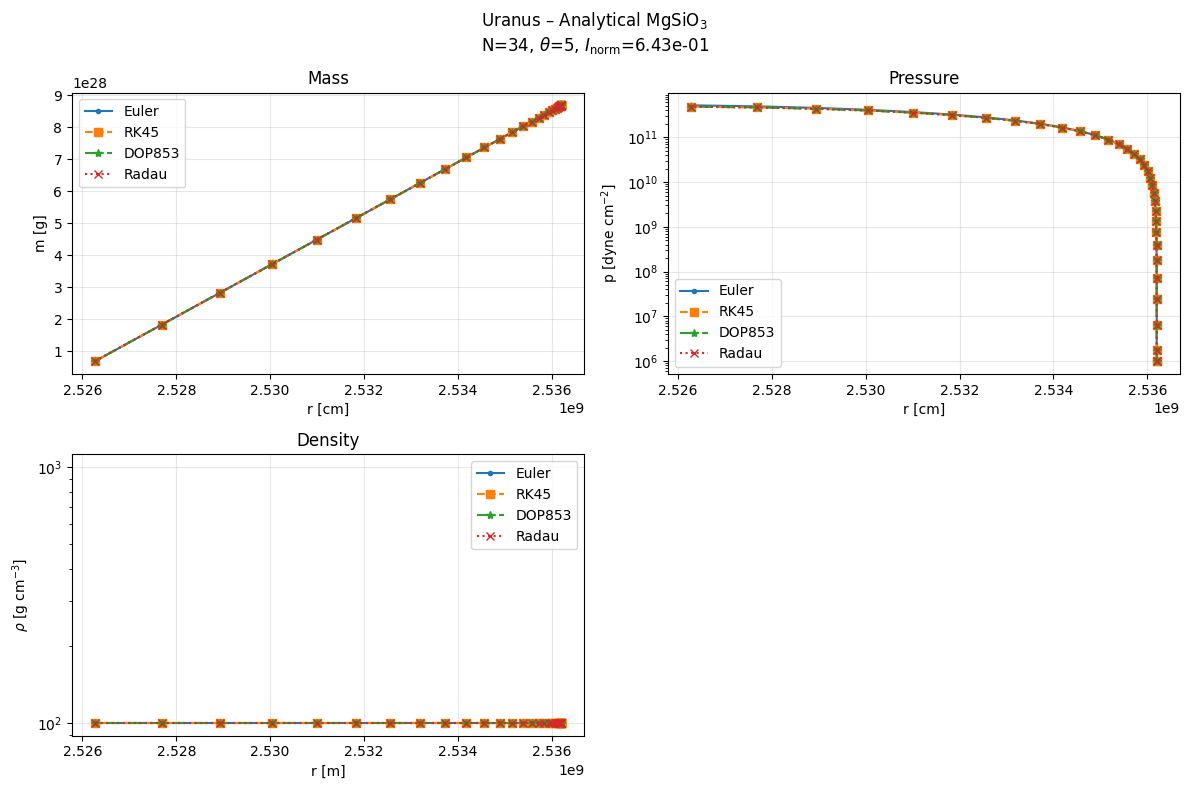

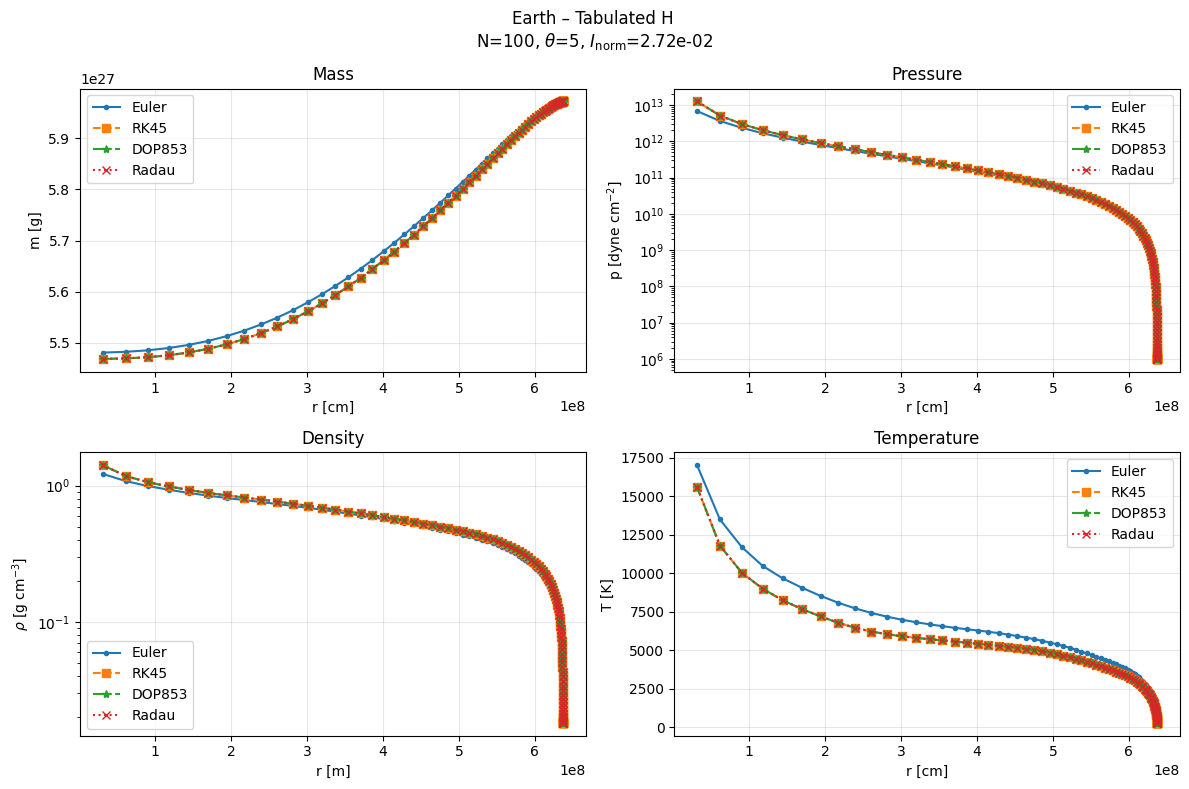

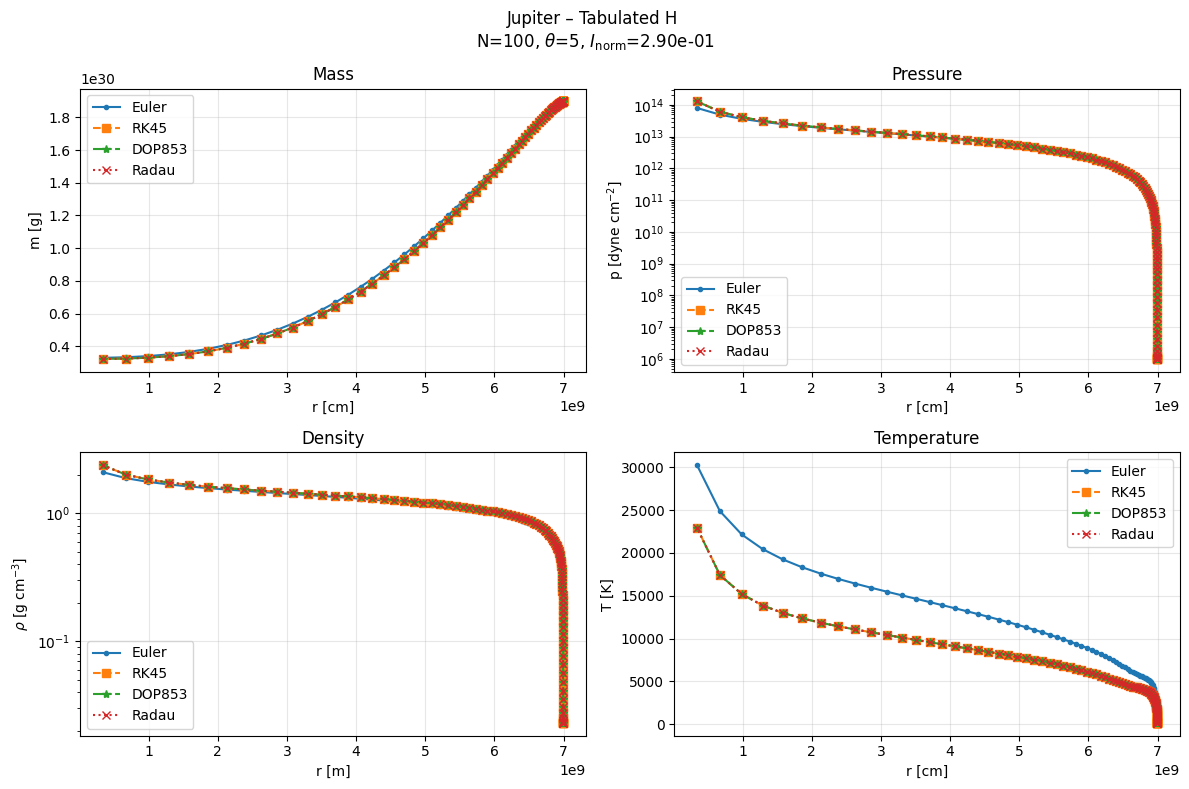

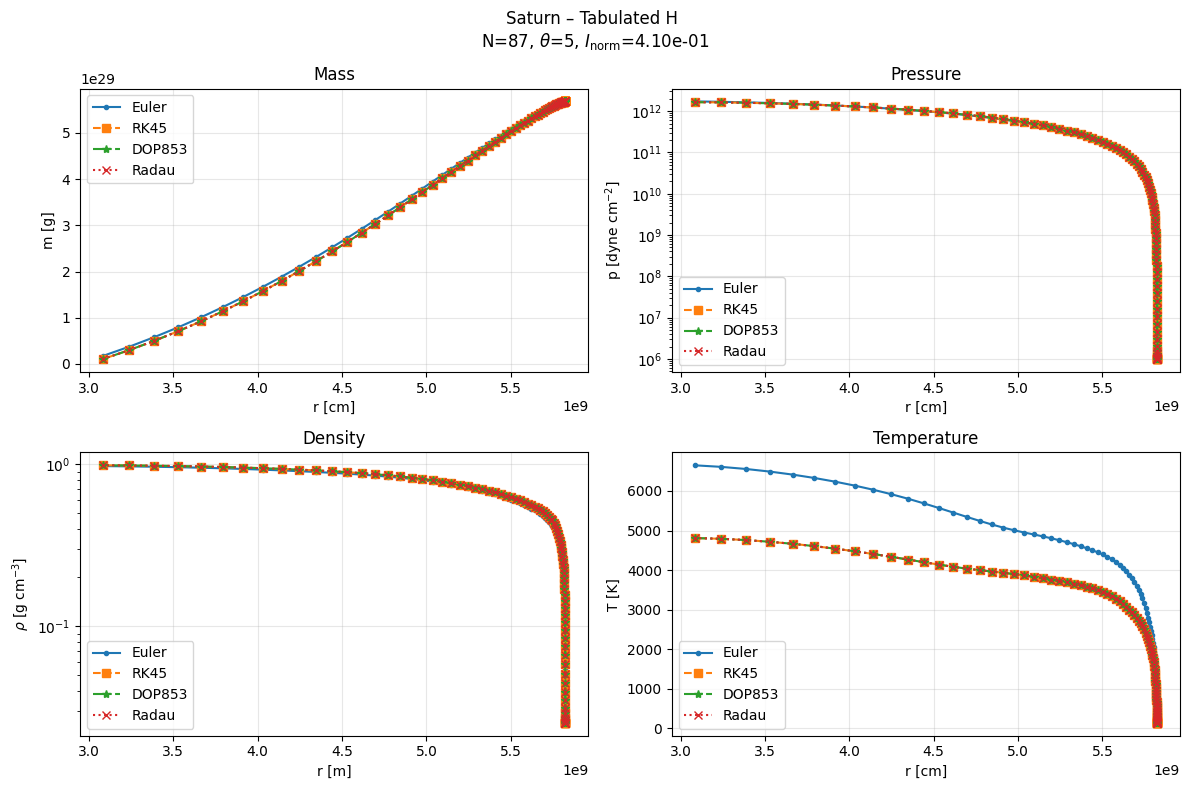

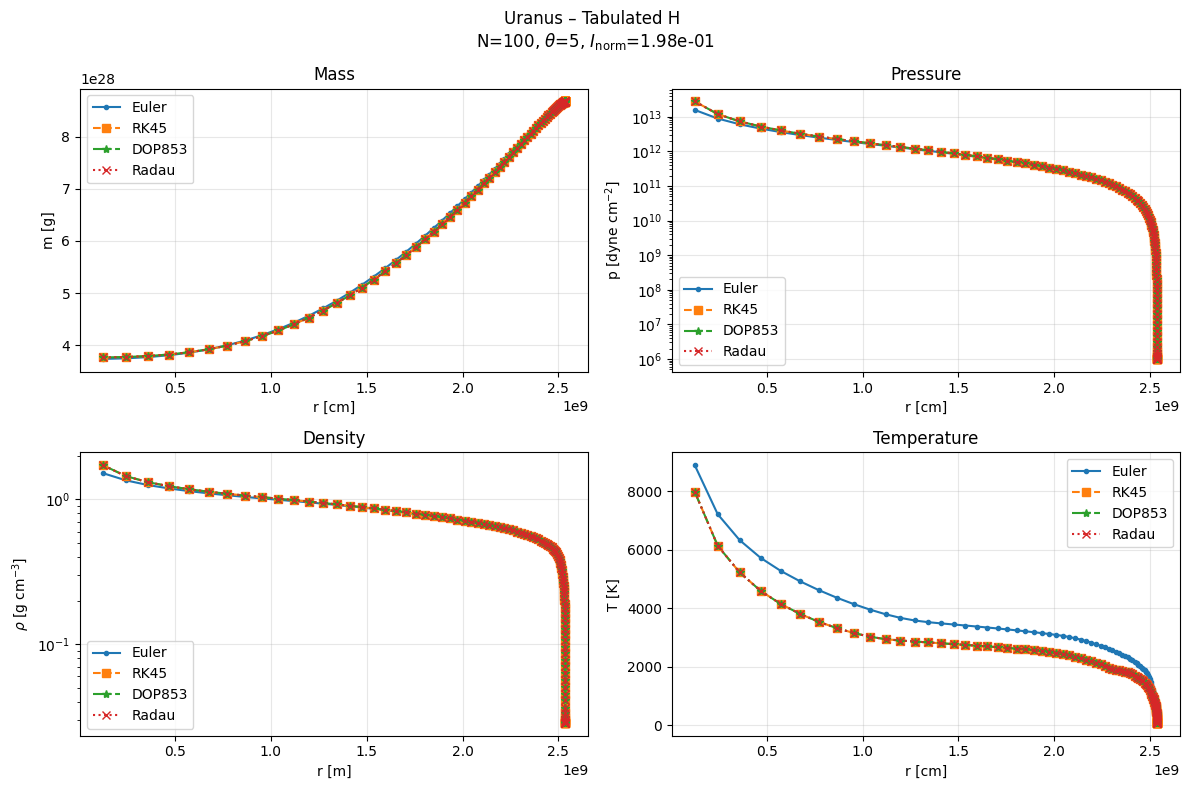

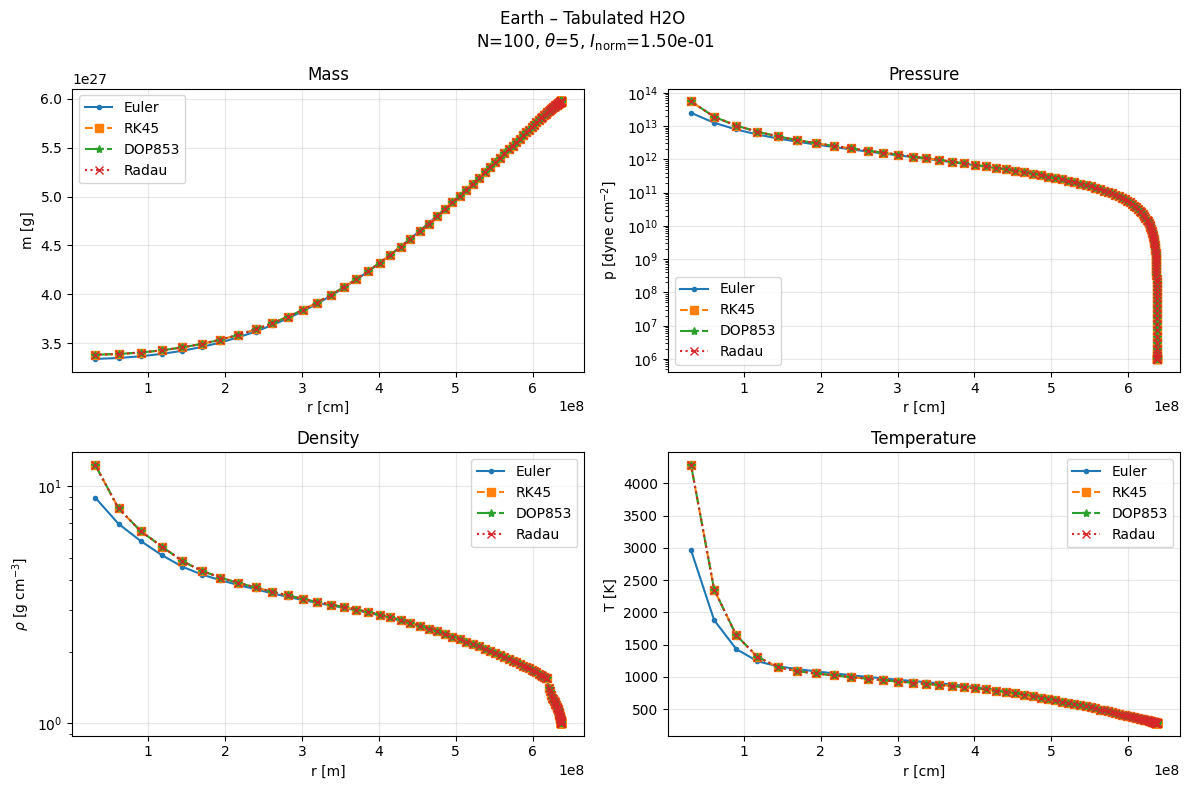

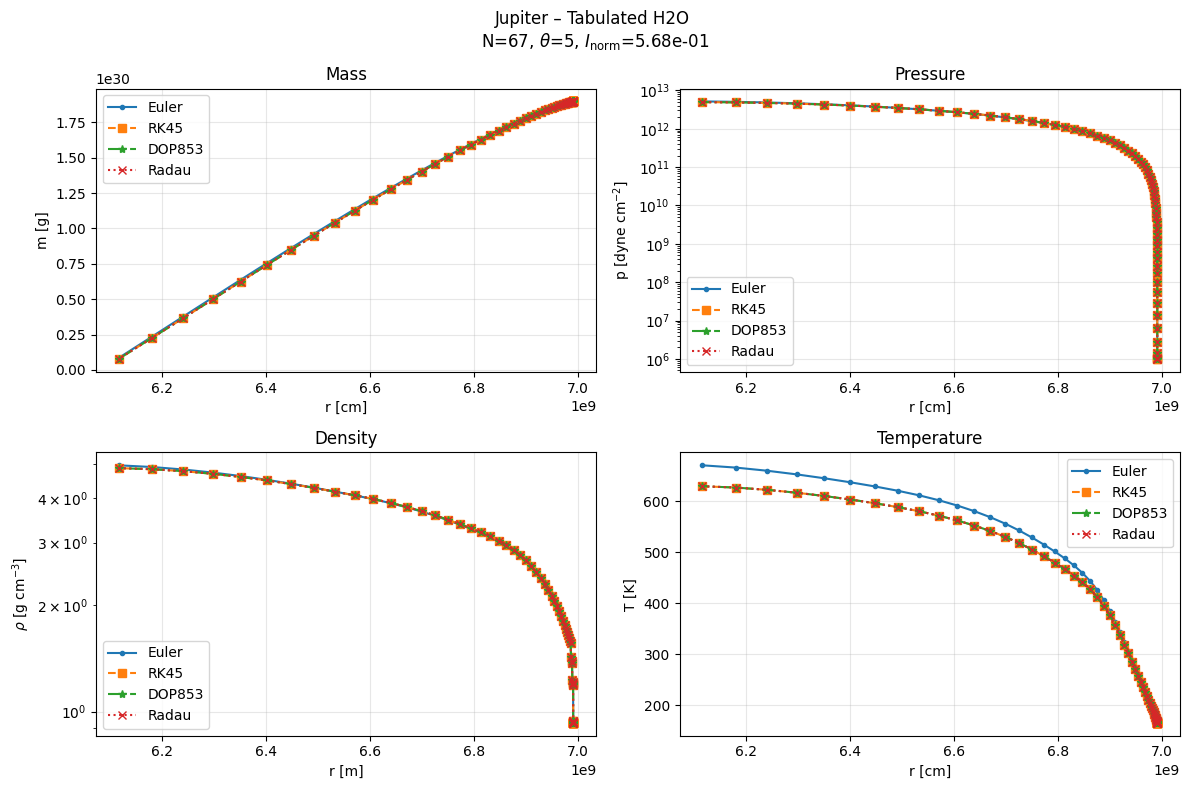

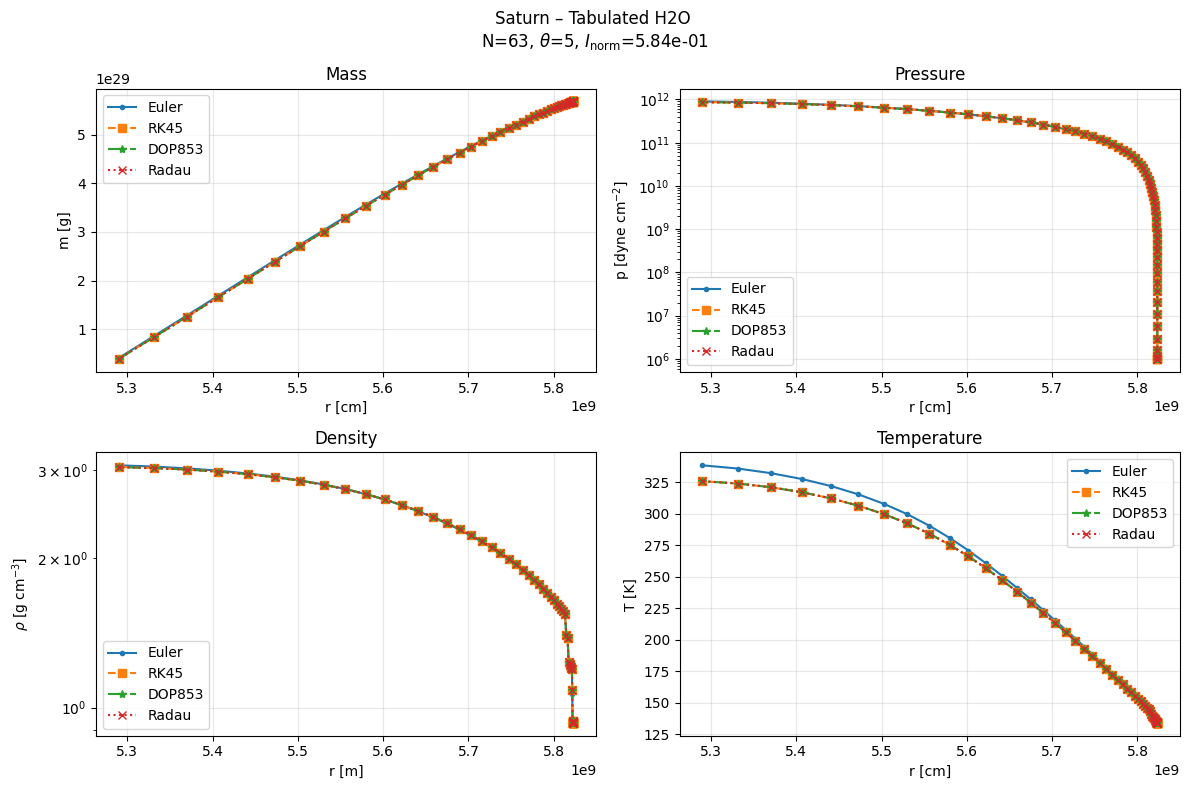

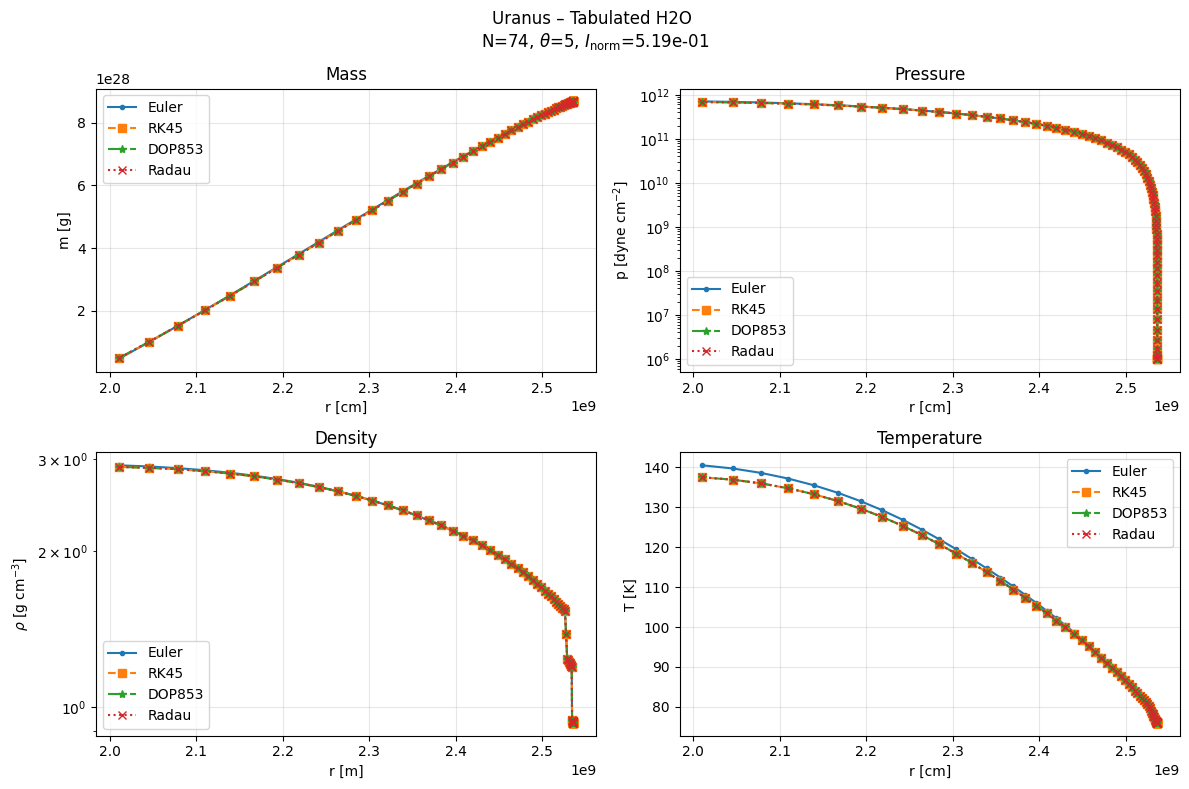

In [ ]:
N = 100
theta = 5

for planet in ['Earth', 'Jupiter', 'Saturn', 'Uranus']:
    for sim_no in [1, 2, 3, 4, 5, 6]:   
        datas, used_sim_methods = load_data(planet, sim_no, N, theta)
        plot_data(datas, used_sim_methods, planet, sim_no, N, theta, show_plot=True)

